# Neural Language Model: A Start


(https://machinelearningmastery.com/develop-word-based-neural-language-models-python-keras/)
- English texts
- Three methods to build a neural language model:
    - bigram
    - trigram
    - line-based

## Workflow of Neural Language Model

![](../images/neural-language-model-flowchart.png)

## Bigram Model

In [1]:
import numpy as np
from numpy import array
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical, plot_model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding

### Tokenization

`Tokenizer()`:

- By default, all punctuation is removed, turning the texts into space-separated sequences of words
- Word-index `0` is a reserved index that won't be assigned to any word.
- Important Arguments:

   - `num_words`: the maximum number of words to keep, based on word frequency. Only the most common `num_words-1` words will be kept.
   - `filters`: a string where each element is a character that will be filtered from the texts. The default is all punctuation, plus tabs and line breaks, minus the `'` character.
   - `lower`: boolean. Whether to convert the texts to lowercase.
   - `split`: str. Separator for word splitting.
   - `char_level`: if True, every character will be treated as a token.
   - `oov_token`: if given, it will be added to word_index and used to replace out-of-vocabulary words during text_to_sequence calls

In [2]:
# source text
data = """ Jack and Jill went up the hill\n
		To fetch a pail of water\n
		Jack fell down and broke his crown\n
		And Jill came tumbling after\n """
# integer encode text
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

# now the data consists of a sequence of word index integers
encoded = tokenizer.texts_to_sequences([data])[0]

# determine the vocabulary size
vocab_size = len(tokenizer.word_index) + 1

print('Vocabulary Size: %d' % vocab_size)

Vocabulary Size: 22


### Text-to-Sequences and Training Data

In [3]:
# create word -> word sequences
sequences = list()
for i in range(1, len(encoded)):
    sequence = encoded[i - 1:i + 1]
    sequences.append(sequence)
print('Total Sequences: %d' % len(sequences))
sequences = array(sequences)

Total Sequences: 24


In [4]:
sequences[:5]

array([[2, 1],
       [1, 3],
       [3, 4],
       [4, 5],
       [5, 6]])

- For bigram models, the first word is the input *X* and the second word is the expected output *y*.

In [5]:
# split into X and y elements
X, y = sequences[:, 0], sequences[:, 1]

In [6]:
X

array([ 2,  1,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13,  2, 14, 15,  1,
       16, 17, 18,  1,  3, 19, 20])

In [7]:
y

array([ 1,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13,  2, 14, 15,  1, 16,
       17, 18,  1,  3, 19, 20, 21])

### One-hot Representation of the Next-Word 

In [8]:
# one hot encode outputs
y = to_categorical(y, num_classes=vocab_size)

In [9]:
y.shape

(24, 22)

In [10]:
y[:4]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.]], dtype=float32)

### Define RNN Language Model

In [11]:
# define model
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=1)) # embedding dimension
model.add(LSTM(50)) # LSTM Complexity
model.add(Dense(vocab_size, activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1, 10)             220       
_________________________________________________________________
lstm (LSTM)                  (None, 50)                12200     
_________________________________________________________________
dense (Dense)                (None, 22)                1122      
Total params: 13,542
Trainable params: 13,542
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
# compile network
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# fit network
model.fit(X, y, epochs=500, verbose=2)

Epoch 1/500
1/1 - 0s - loss: 3.0912 - accuracy: 0.0000e+00
Epoch 2/500
1/1 - 0s - loss: 3.0905 - accuracy: 0.1250
Epoch 3/500
1/1 - 0s - loss: 3.0897 - accuracy: 0.1667
Epoch 4/500
1/1 - 0s - loss: 3.0890 - accuracy: 0.1667
Epoch 5/500
1/1 - 0s - loss: 3.0882 - accuracy: 0.1667
Epoch 6/500
1/1 - 0s - loss: 3.0875 - accuracy: 0.1250
Epoch 7/500
1/1 - 0s - loss: 3.0868 - accuracy: 0.1250
Epoch 8/500
1/1 - 0s - loss: 3.0860 - accuracy: 0.1250
Epoch 9/500
1/1 - 0s - loss: 3.0852 - accuracy: 0.1250
Epoch 10/500
1/1 - 0s - loss: 3.0845 - accuracy: 0.1250
Epoch 11/500
1/1 - 0s - loss: 3.0837 - accuracy: 0.1250
Epoch 12/500
1/1 - 0s - loss: 3.0829 - accuracy: 0.1250
Epoch 13/500
1/1 - 0s - loss: 3.0821 - accuracy: 0.1250
Epoch 14/500
1/1 - 0s - loss: 3.0813 - accuracy: 0.1250
Epoch 15/500
1/1 - 0s - loss: 3.0804 - accuracy: 0.1250
Epoch 16/500
1/1 - 0s - loss: 3.0796 - accuracy: 0.1250
Epoch 17/500
1/1 - 0s - loss: 3.0787 - accuracy: 0.1250
Epoch 18/500
1/1 - 0s - loss: 3.0778 - accuracy: 0.12

Epoch 147/500
1/1 - 0s - loss: 2.2062 - accuracy: 0.2083
Epoch 148/500
1/1 - 0s - loss: 2.1925 - accuracy: 0.2083
Epoch 149/500
1/1 - 0s - loss: 2.1787 - accuracy: 0.2083
Epoch 150/500
1/1 - 0s - loss: 2.1649 - accuracy: 0.2083
Epoch 151/500
1/1 - 0s - loss: 2.1511 - accuracy: 0.2083
Epoch 152/500
1/1 - 0s - loss: 2.1374 - accuracy: 0.2500
Epoch 153/500
1/1 - 0s - loss: 2.1236 - accuracy: 0.2500
Epoch 154/500
1/1 - 0s - loss: 2.1098 - accuracy: 0.2917
Epoch 155/500
1/1 - 0s - loss: 2.0961 - accuracy: 0.2917
Epoch 156/500
1/1 - 0s - loss: 2.0823 - accuracy: 0.2917
Epoch 157/500
1/1 - 0s - loss: 2.0686 - accuracy: 0.3333
Epoch 158/500
1/1 - 0s - loss: 2.0549 - accuracy: 0.3333
Epoch 159/500
1/1 - 0s - loss: 2.0411 - accuracy: 0.3333
Epoch 160/500
1/1 - 0s - loss: 2.0274 - accuracy: 0.3750
Epoch 161/500
1/1 - 0s - loss: 2.0137 - accuracy: 0.3750
Epoch 162/500
1/1 - 0s - loss: 2.0000 - accuracy: 0.4167
Epoch 163/500
1/1 - 0s - loss: 1.9863 - accuracy: 0.4583
Epoch 164/500
1/1 - 0s - loss: 

Epoch 291/500
1/1 - 0s - loss: 0.6174 - accuracy: 0.8333
Epoch 292/500
1/1 - 0s - loss: 0.6119 - accuracy: 0.8333
Epoch 293/500
1/1 - 0s - loss: 0.6065 - accuracy: 0.8333
Epoch 294/500
1/1 - 0s - loss: 0.6011 - accuracy: 0.8333
Epoch 295/500
1/1 - 0s - loss: 0.5959 - accuracy: 0.8333
Epoch 296/500
1/1 - 0s - loss: 0.5907 - accuracy: 0.8750
Epoch 297/500
1/1 - 0s - loss: 0.5856 - accuracy: 0.8750
Epoch 298/500
1/1 - 0s - loss: 0.5806 - accuracy: 0.8750
Epoch 299/500
1/1 - 0s - loss: 0.5757 - accuracy: 0.8750
Epoch 300/500
1/1 - 0s - loss: 0.5708 - accuracy: 0.8750
Epoch 301/500
1/1 - 0s - loss: 0.5661 - accuracy: 0.8750
Epoch 302/500
1/1 - 0s - loss: 0.5614 - accuracy: 0.8750
Epoch 303/500
1/1 - 0s - loss: 0.5568 - accuracy: 0.8750
Epoch 304/500
1/1 - 0s - loss: 0.5522 - accuracy: 0.8750
Epoch 305/500
1/1 - 0s - loss: 0.5477 - accuracy: 0.8750
Epoch 306/500
1/1 - 0s - loss: 0.5434 - accuracy: 0.8750
Epoch 307/500
1/1 - 0s - loss: 0.5390 - accuracy: 0.8750
Epoch 308/500
1/1 - 0s - loss: 

Epoch 435/500
1/1 - 0s - loss: 0.2932 - accuracy: 0.8750
Epoch 436/500
1/1 - 0s - loss: 0.2923 - accuracy: 0.8750
Epoch 437/500
1/1 - 0s - loss: 0.2914 - accuracy: 0.8750
Epoch 438/500
1/1 - 0s - loss: 0.2905 - accuracy: 0.8750
Epoch 439/500
1/1 - 0s - loss: 0.2896 - accuracy: 0.8750
Epoch 440/500
1/1 - 0s - loss: 0.2888 - accuracy: 0.8750
Epoch 441/500
1/1 - 0s - loss: 0.2879 - accuracy: 0.8750
Epoch 442/500
1/1 - 0s - loss: 0.2870 - accuracy: 0.8750
Epoch 443/500
1/1 - 0s - loss: 0.2862 - accuracy: 0.8750
Epoch 444/500
1/1 - 0s - loss: 0.2853 - accuracy: 0.8750
Epoch 445/500
1/1 - 0s - loss: 0.2845 - accuracy: 0.8750
Epoch 446/500
1/1 - 0s - loss: 0.2836 - accuracy: 0.8750
Epoch 447/500
1/1 - 0s - loss: 0.2828 - accuracy: 0.8750
Epoch 448/500
1/1 - 0s - loss: 0.2820 - accuracy: 0.8750
Epoch 449/500
1/1 - 0s - loss: 0.2812 - accuracy: 0.8750
Epoch 450/500
1/1 - 0s - loss: 0.2804 - accuracy: 0.8750
Epoch 451/500
1/1 - 0s - loss: 0.2796 - accuracy: 0.8750
Epoch 452/500
1/1 - 0s - loss: 

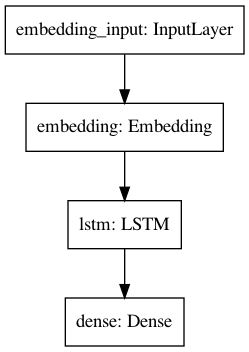

In [13]:
plot_model(model)

In [14]:
# generate a sequence from the model
def generate_seq(model, tokenizer, seed_text, n_words):
    in_text, result = seed_text, seed_text
    # generate a fixed number of words
    for _ in range(n_words):
        # encode the text as integer
        encoded = tokenizer.texts_to_sequences([in_text])[0]
        encoded = array(encoded)
        # predict a word in the vocabulary
        #yhat = model.predict_classes(encoded, verbose=0)
        yhat=np.argmax(model.predict(encoded), axis=-1)
        # map predicted word index to word
        out_word = ''
        for word, index in tokenizer.word_index.items():
            if index == yhat:
                out_word = word
                break
        # append to input
        in_text, result = out_word, result + ' ' + out_word
    return result

```{tip}
When we generate the output sequence, we use a **greedy search**, which selects the most likely word at each time step in the output sequence. While this approach features its efficiency, the quality of the final output sequences may not be necessarily optimal.
```

In [15]:
# evaluate
print(generate_seq(model, tokenizer, 'Jill', 5))

Jill went up the hill to


## Beam Search

### Searching in NLP

- In the previous demonstration, when we generate the predicted next word, we adopt a naive approach, i.e., always choosing the word of the highest probability.
- It is common in NLP for models to output a probability distribution over words in the vocabulary.
- This step involves searching through all the possible output sequences based on their likelihood.
- Choosing the next word of highest probability does not guarantee us the most optimal sequence.
- The search problem is exponential in the length of the output sequence given the large size of vocabulary.


### Beam Search Decoding

The beam search expands all possible next steps and keeps the **$k$** most likely, where **$k$** is a researcher-specified parameter and controls the number of beams or parallel searches through the sequence of probabilities.

The search process can stop for each candidate independently either by:

- reaching a maximum length
- reaching an end-of-sequence token
- reaching a threshold likelihood

```{note]
Please see Jason Brownlee's blog post [How to Implement a Beam Search Decoder for Natural Language Processing](https://machinelearningmastery.com/beam-search-decoder-natural-language-processing/) for the python implementation.

The following codes are based on Jason's code.
```

Not sure if the following code works ....Needs checking.

In [16]:
# generate a sequence from the model
def generate_seq_beam(model, tokenizer, seed_text, n_words, k):
    in_text = seed_text 
    sequences = [[[in_text], 0.0]]
    # prepare id_2_word map
    id_2_word = dict([(id,w) for (w, id) in tokenizer.word_index.items()])
    
    # start next-word generating
    for _ in range(n_words):
        all_candidates = list()        
        #print("Next word ", _+1)
        # temp list to hold all possible candidates
        # `sequence + next words`

        
        # for each existing sentence
        # take the last word of the sequence
        # find probs of all words in the next position
        # save the top k
        # all_candidates should have 3 * 22 = 66 candidates
        for i in range(len(sequences)):
            seq, score = sequences[i]
            # next word probablity distribution
            encoded = tokenizer.texts_to_sequences([seq[-1]])[0]
            encoded = array(encoded)
            model_pred_prob = model.predict(encoded).flatten()
            
            # try each of `sequence + nextword`
            for j in range(len(model_pred_prob)):
                candidate = [seq + [id_2_word.get(j+1)], score-np.log(model_pred_prob[j])]
                all_candidates.append(candidate)
            
            # order all candidates (seqence + nextword) by score
            #print("all_condidates length:", len(all_candidates))
            ordered = sorted(all_candidates, key = lambda x:x[1]) # default ascending
            # select k best
            sequences = ordered[:k] ## choose top k
    return sequences

In [19]:
generate_seq_beam(model, tokenizer, 'Jill', 5, k =5)

[[['Jill', 'up', 'hill', 'fetch', 'pail', 'water'], 1.0160576105117798],
 [['Jill', 'up', 'hill', 'fetch', 'pail', 'broke'], 5.479756973683834],
 [['Jill', 'up', 'hill', 'fetch', 'pail', 'broke', 'crown'], 5.51508317515254],
 [['Jill', 'up', 'hill', 'fetch', 'pail', 'broke', 'crown', 'jack'],
  5.551574371755123],
 [['Jill', 'up', 'hill', 'fetch', 'pail', 'crown'], 5.742704056203365]]

In [18]:

# topk_ind = np.argpartition(model_pred_prob, -k, axis=None)[-k:]
#         topk_prob = model_pred_prob[topk_ind]
#         topk_word = [id_2_word.get(id) for id in topk_ind]

#     print(topk_prob[np.argsort(-topk_prob)])
#     print(topk_ind[np.argsort(-topk_prob)])
# np.argmax(model.predict(encoded))

# yhat=np.argmax(model.predict(encoded), axis=-1) # in `np.argmax`, `axis = -1` uses flatten array
#         # map predicted word index to word
# out_word = ''
# for word, index in tokenizer.word_index.items():
#     if index == yhat:
#         out_word = word
#         break
# print(out_word)
# model_pred_prob = model.predict(encoded).flatten()
# topk_ind = np.argpartition(model_pred_prob, -k, axis=None)[-k:]
# print(topk_ind)

# topk_prob = model_pred_prob[topk_ind]
# print(topk_prob)
# print(topk_prob[np.argsort(-topk_prob)])
# print(topk_ind[np.argsort(-topk_prob)])

## References

- This tutorial is based on Jason Brownlee's blog post [How to Develop Word-Based Neural Language Models in Python with Keras](https://machinelearningmastery.com/develop-word-based-neural-language-models-python-keras/)